# Linear Regression Models

In [1]:
# Import the helper python files
import sys
import os

# Get the absolute path to the project's root directory (QRT)
# This goes 'up' one level from the 'models' folder
PROJECT_ROOT = os.path.abspath('..')

# Add the project root to the system path
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# Now you can import your helper files
import preprocess
import data_sourcing
import visualisations

print("Successfully imported helper modules from project root.")

Successfully imported helper modules from project root.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
tech_sector_tickers = ['NVDA', 'AAPL', 'MSFT', 'GOOGL', 'META', 
                       'INTC', 'CSCO', 'ORCL', 'IBM', 'TSLA', 'AMZN', 
                       'QCOM', 'NFLX', 'ADBE', 'MS', 'ADP', 'LRCX']

data_sourcing.get_price_data(tech_sector_tickers, 
                                       start_date='2015-01-01', 
                                       end_date='2023-01-01')

Fetching price data for ['NVDA', 'AAPL', 'MSFT', 'GOOGL', 'META', 'INTC', 'CSCO', 'ORCL', 'IBM', 'TSLA', 'AMZN', 'QCOM', 'NFLX', 'ADBE', 'MS', 'ADP', 'LRCX']...


[*********************100%***********************]  17 of 17 completed


Successfully saved price data to /Users/main/Desktop/QRT/data/price_data.csv


close        high         low        open     volume
date       ticker                                                           
2015-01-02 AAPL     24.237551   24.705320   23.798600   24.694235  212818400
           ADBE     72.339996   73.199997   71.889999   72.699997    2349200
           ADP      65.986382   66.691482   65.376347   65.740786    1866600
           AMZN     15.426000   15.737500   15.348000   15.629000   55664000
           CSCO     19.815609   20.181635   19.650538   19.995033   22926500
...                       ...         ...         ...         ...        ...
2022-12-30 NFLX     29.488001   29.500999   28.322001   28.552999   75668920
           NVDA     14.600199   14.615184   14.219558   14.320462  310490000
           ORCL     78.760696   78.943774   77.816420   78.172929    5375700
           QCOM    103.229973  103.342644  100.675983  101.380208    5642300
           TSLA    123.180000  124.480003  119.750000  119.949997  157777300

[34238 rows x 5 columns]

In [4]:
tech_df = data_sourcing.load_price_data()

Loading data from /Users/main/Desktop/QRT/data/price_data.csv...


In [5]:
tech_df.head(17)

close       high        low       open     volume
date       ticker                                                       
2015-01-02 AAPL    24.237551  24.705320  23.798600  24.694235  212818400
           ADBE    72.339996  73.199997  71.889999  72.699997    2349200
           ADP     65.986382  66.691482  65.376347  65.740786    1866600
           AMZN    15.426000  15.737500  15.348000  15.629000   55664000
           CSCO    19.815609  20.181635  19.650538  19.995033   22926500
           GOOGL   26.296135  26.606494  26.213205  26.447589   26480000
           IBM     98.123062  98.879910  97.481262  97.668961    5779673
           INTC    27.896460  28.510242  27.704652  28.134299   23605600
           LRCX     6.814785   6.878259   6.762463   6.850811    8306000
           META    77.969330  78.446392  77.223925  78.098538   18177500
           MS      28.715620  29.042020  28.374386  28.967837    7333800
           MSFT    39.933052  40.496692  39.745174  39.847653   27913900
           NFLX     4.984857   5.033142   4.873142   4.911714  134748250
           NVDA     0.483038   0.486638   0.475360   0.483038  113680000
           ORCL    37.583096  38.312203  37.277886  38.168078   15070200
           QCOM    54.612598  55.046385  54.222929  54.781703    6662700
           TSLA    14.620667  14.883333  14.217333  14.858000   71466000

In [6]:
tech_fundamental = data_sourcing.get_fundamental_data(tech_sector_tickers)
data_sourcing.load_fundamental_data()

Fetching fundamental data for 17 tickers...
Successfully saved fundamental data to /Users/main/Desktop/QRT/data/fundamental_data.csv
Loading data from /Users/main/Desktop/QRT/data/fundamental_data.csv...


,trailingPE,priceToBook,priceToSalesTtm,enterpriseToEbitda,returnOnEquity,returnOnAssets,operatingMargins,profitMargins,debtToEquity,currentRatio,quickRatio,earningsGrowth,revenueGrowth,beta,marketCap,sector,industry
ticker,,,,,,,,,,,,,,,,,
NVDA,54.025566,46.236324,NaN,46.550,1.09417,0.53094,0.60843,0.52414,10.584,4.214,3.488,0.612,0.556,2.269,4630069116928,Technology,Semiconductors
AAPL,36.516087,54.580242,NaN,28.207,1.71422,0.22964,0.31647,0.26915,152.411,0.893,0.771,0.912,0.079,1.109,4033205501952,Technology,Consumer Electronics
MSFT,36.234375,10.445946,NaN,22.893,0.32241,0.14656,0.48873,0.35707,33.154,1.401,1.254,0.127,0.184,1.065,3791850569728,Technology,Software - Infrastructure
GOOGL,27.313242,8.628914,NaN,22.601,0.35450,0.16276,0.30512,0.32233,11.424,1.747,1.563,0.353,0.159,1.082,3364478255104,Communication Services,Internet Content & Information
META,26.955330,7.917121,NaN,15.679,0.32643,0.18013,0.40075,0.30892,26.311,1.978,1.671,-0.826,0.262,1.272,1537244659712,Communication Services,Internet Content & Information
INTC,592.000000,1.591398,NaN,18.722,0.00186,-0.00463,0.06284,0.00371,39.881,1.602,1.057,NaN,0.028,1.346,171290705920,Technology,Semiconductors
CSCO,30.115831,6.582834,NaN,20.479,0.22418,0.06644,0.23638,0.17902,59.926,0.927,0.667,0.060,0.075,0.869,307376553984,Technology,Communication Equipment
ORCL,51.585648,26.211481,NaN,30.021,0.69242,0.07152,0.31381,0.21080,452.534,0.618,0.498,-0.019,0.122,1.636,635299168256,Technology,Software - Infrastructure
IBM,36.478520,10.239841,NaN,18.998,0.30156,0.06350,0.17170,0.12090,237.831,0.932,0.775,NaN,0.091,0.688,285739220992,Technology,Information Technology Services


#

TO DO:
Perform L1 Regression comparing NVIDIA with like 20 stocks of our choice

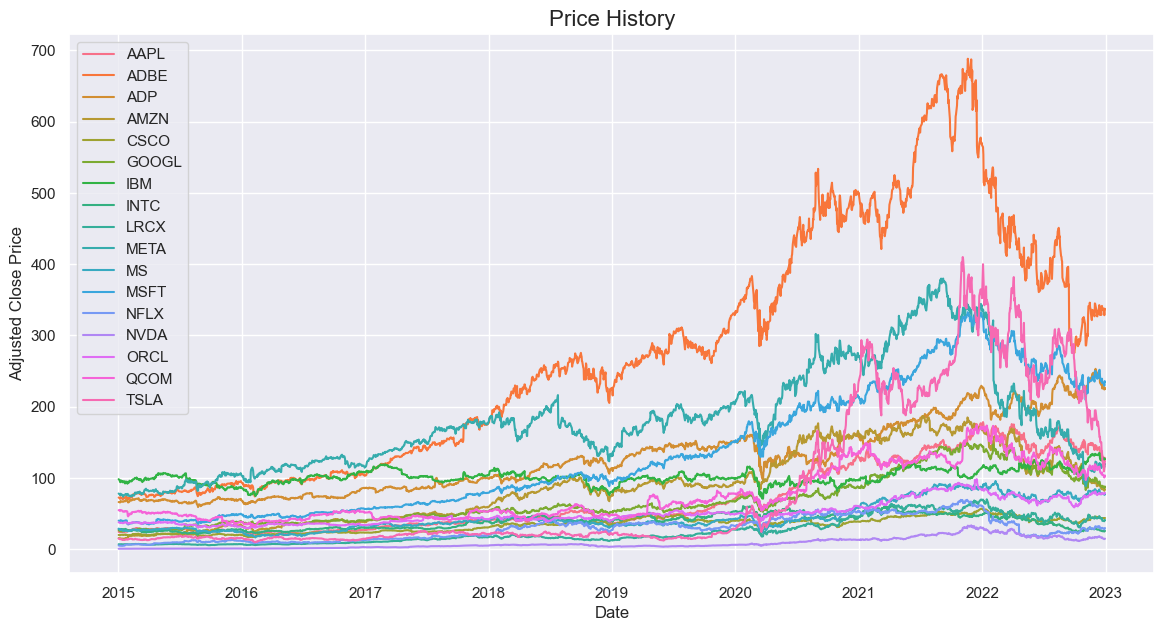

In [7]:
visualisations.plot_price_history(tech_df)

In [12]:
raw_data.head()

close       high        low       open     volume  \
date       ticker                                                          
2015-01-02 AAPL    24.237551  24.705320  23.798600  24.694235  212818400   
           ADBE    72.339996  73.199997  71.889999  72.699997    2349200   
           ADP     65.986382  66.691482  65.376347  65.740786    1866600   
           AMZN    15.426000  15.737500  15.348000  15.629000   55664000   
           CSCO    19.815609  20.181635  19.650538  19.995033   22926500   

                  ticker  
date       ticker         
2015-01-02 AAPL      all  
           ADBE      all  
           ADP       all  
           AMZN      all  
           CSCO      all

In [11]:
# === In your main_project.ipynb ===

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# 1. Import your helper functions
import preprocess
import data_sourcing  # (Assuming you have this)

# 2. Load data
raw_data = data_sourcing.get_price_data(tech_sector_tickers, 
                                       start_date='2015-01-01', 
                                       end_date='2023-01-01')
# 'raw_data' might look like:
# date         ticker   close   volume   sector
# 2020-01-02   AAPL     150.0   1.2M     'Tech'
# 2020-01-02   MSFT     200.0   0.9M     'Tech'
# ...

# 3. Engineer Quant-Specific Features
engineered_data = preprocess.engineer_financial_features(raw_data, price_col='close', windows=[20, 50])

# 4. Define features (X) and target (y)
# This is a critical step. Your 'target' is what you want to predict (e.g., next day's return)
engineered_data['target'] = engineered_data.groupby('ticker')['close_log_return'].shift(-1)
engineered_data = engineered_data.dropna() # Drop NaNs from target shift

# Define which columns are features
numeric_features = ['ma_20', 'vol_20', 'ma_50', 'vol_50', 'momentum_20', 'volume']
categorical_features = ['sector'] # 'ticker' could also be a categorical feature
target = 'target'

features = numeric_features + categorical_features
X = engineered_data[features]
y = engineered_data[target]

# 5. Split data (IMPORTANT: For time series, DO NOT SHUFFLE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 6. Create the preprocessing pipeline
preprocessor = preprocess.create_preprocessing_pipeline(numeric_features, categorical_features)

# 7. Create the full model pipeline
# This pipeline will:
#    a) Apply the preprocessor (scaling, one-hot-encoding)
#    b) Feed the processed data into the model (LinearRegression)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# 8. Fit and Evaluate
model_pipeline.fit(X_train, y_train)
score = model_pipeline.score(X_test, y_test)
print(f"Model R-squared: {score}")


[**********************47%                       ]  8 of 17 completed

Fetching price data for ['NVDA', 'AAPL', 'MSFT', 'GOOGL', 'META', 'INTC', 'CSCO', 'ORCL', 'IBM', 'TSLA', 'AMZN', 'QCOM', 'NFLX', 'ADBE', 'MS', 'ADP', 'LRCX']...


[*********************100%***********************]  17 of 17 completed


Successfully saved price data to /Users/main/Desktop/QRT/data/price_data.csv


ValueError: 'ticker' is both an index level and a column label, which is ambiguous.